In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.utils import shuffle
from keras import backend as K
K.image_data_format()
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import glob
import os
import cv2
import warnings
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

warnings.filterwarnings("ignore")


# Normal

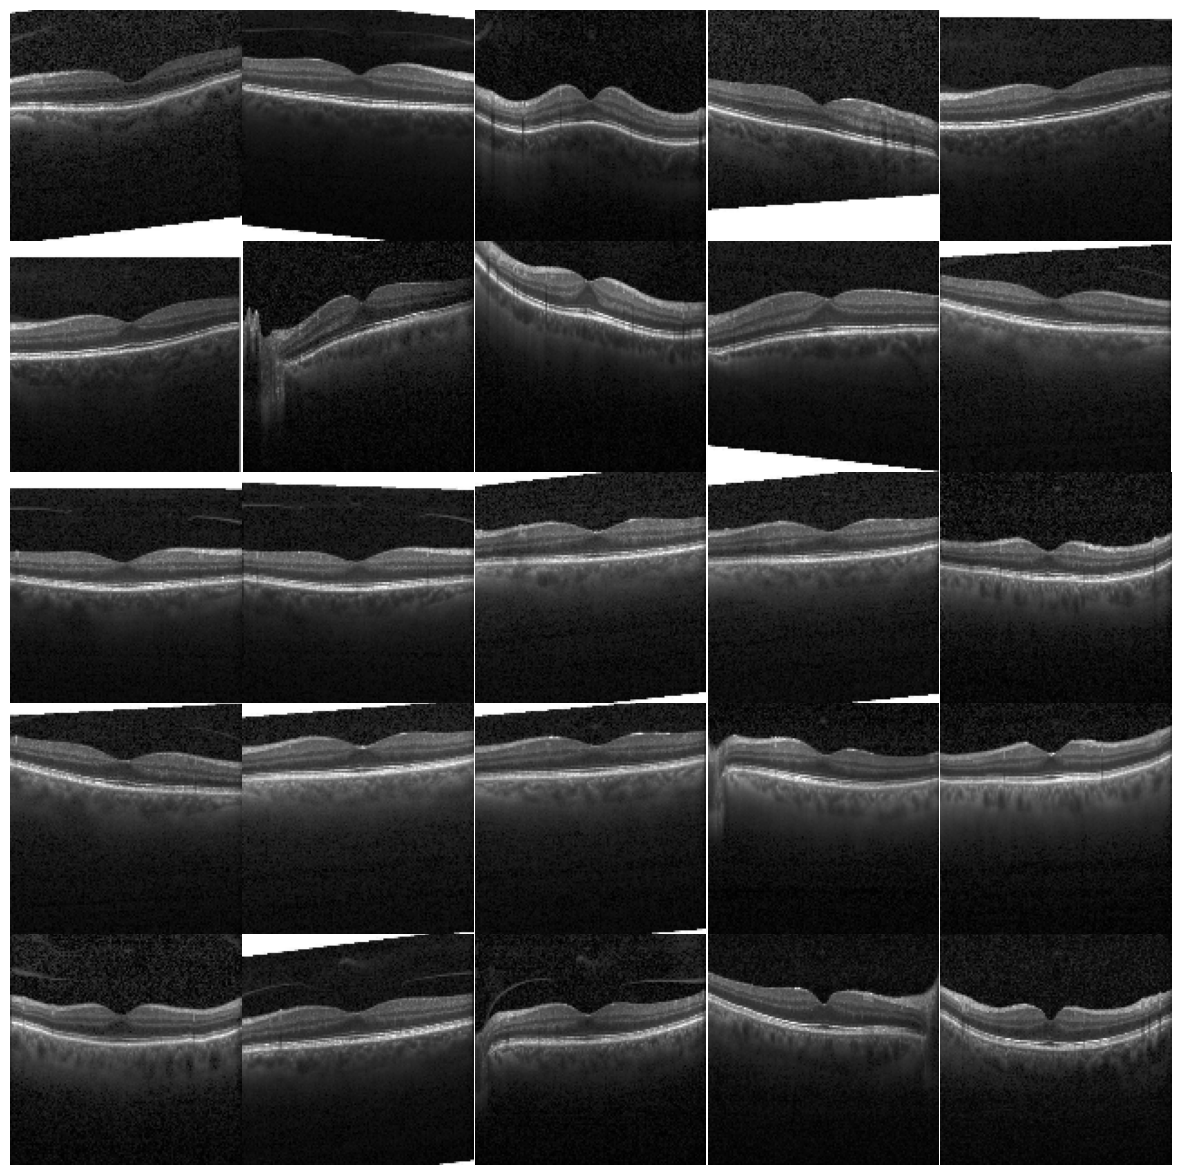

In [2]:
multipleImages = glob.glob(r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\OCT2017\train\NORMAL\**")
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# Abnormality

## DME

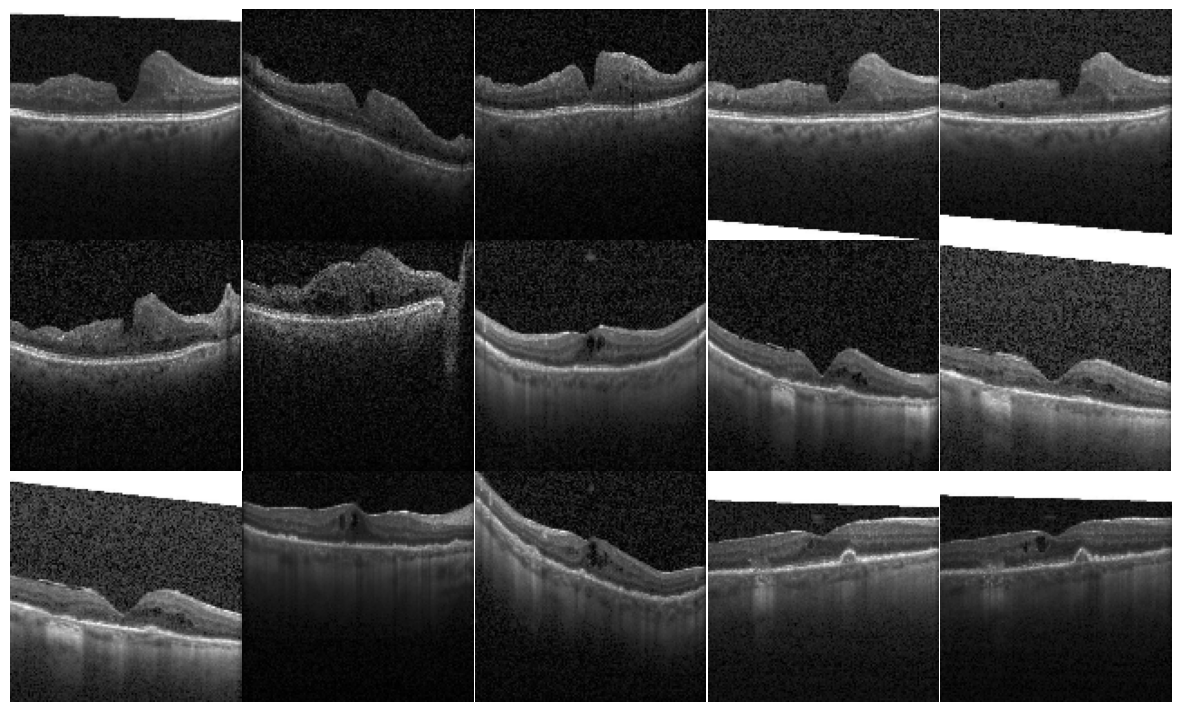

In [3]:
multipleImages = glob.glob(r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\OCT2017\train\DME\**")
i_ = 0
plt.rcParams['figure.figsize']  =  (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

## CNV 

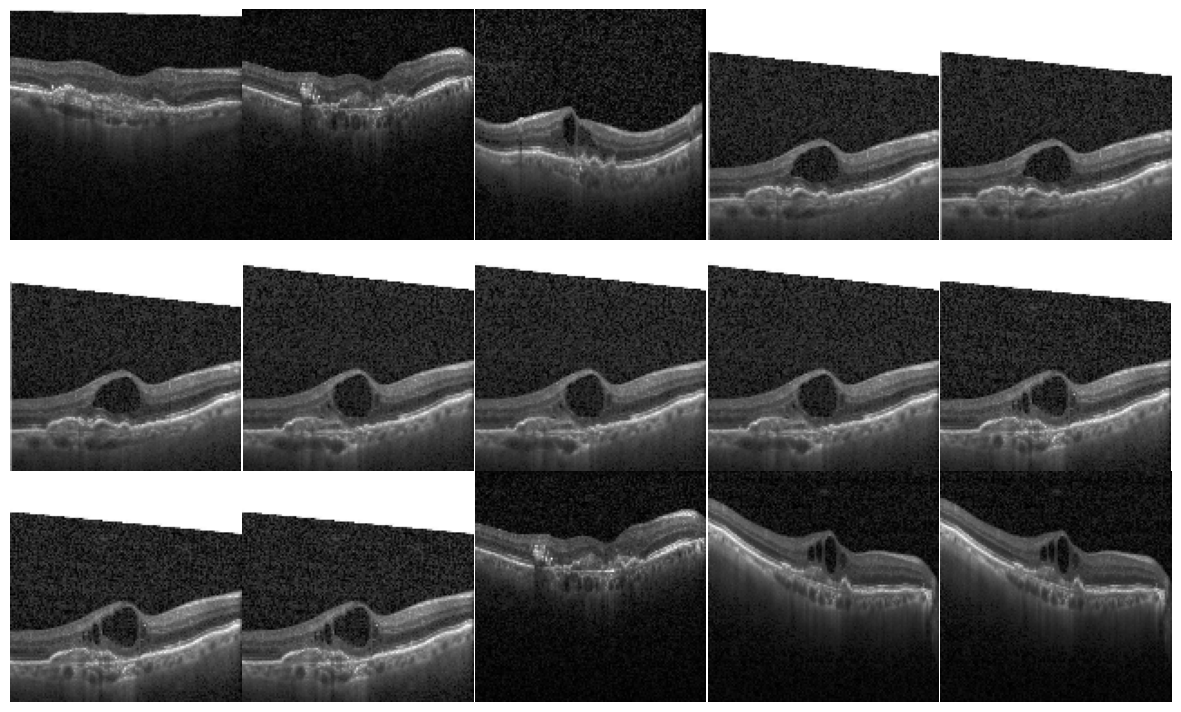

In [4]:
multipleImages = glob.glob(r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\OCT2017\train\CNV\**")
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

## DRUSEN

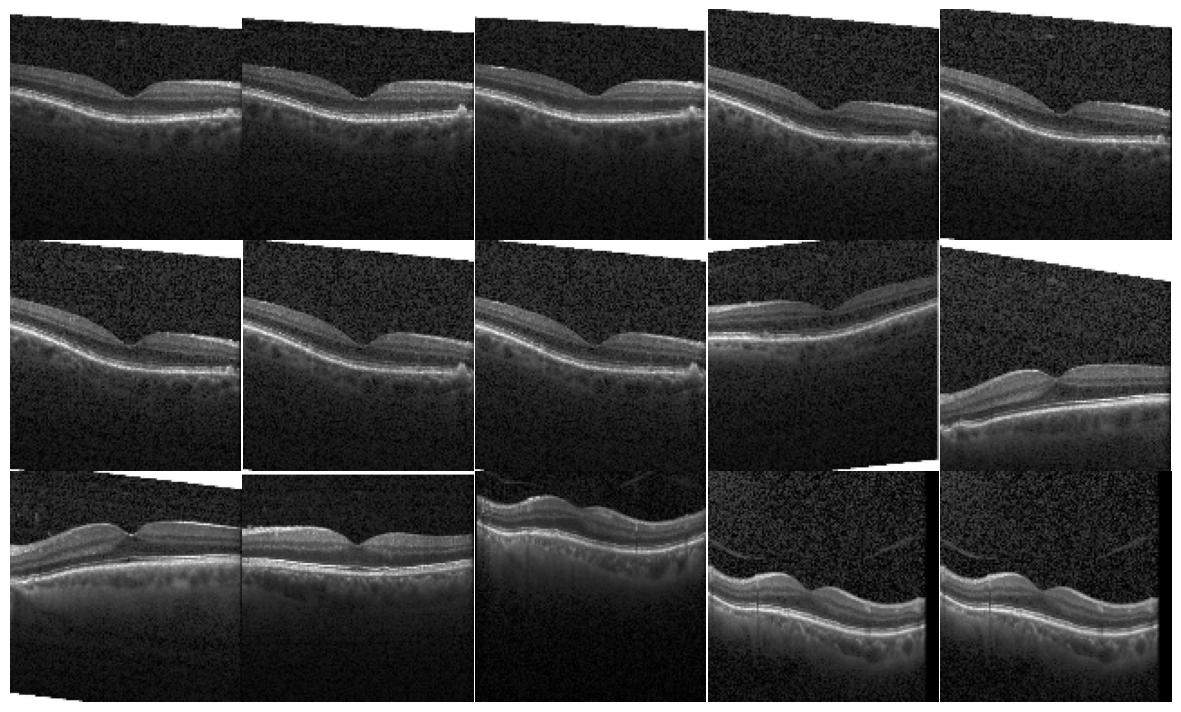

In [5]:
multipleImages = glob.glob(r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\OCT2017\train\DRUSEN\**")
i_ = 0
plt.rcParams['figure.figsize']  = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# Image Preprocessing
- resizing
- denoising
- Augmentation : rotation, flipping
- Data Loaders

## Train Set

In [6]:
import os
import cv2
import shutil
import torch
from torchvision import datasets, transforms

# Define the input path
input_path = r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\OCT2017\train"
# Define the output path for processed data
output_path = "py_processed_train"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define the target size for images
target_size = (224, 224)

# Process images and save them to the output directory
for class_name in ["NORMAL", "CNV", "DRUSEN", "DME"]:
    input_class_path = os.path.join(input_path, class_name)
    output_class_path = os.path.join(output_path, class_name.lower())
    os.makedirs(output_class_path, exist_ok=True)
    for filename in os.listdir(input_class_path):
        image_path = os.path.join(input_class_path, filename)
        output_image_path = os.path.join(output_class_path, filename)
        image = cv2.imread(image_path)
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)




In [7]:
# Define the path to the processed data directory
data_dir = 'py_processed_train/'

# Define the transforms for data augmentation and normalization
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder and apply the defined transforms
train_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the batch size for training
batch_size = 32

# Create a DataLoader for the training dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



In [8]:
print("Number of batches in train loader:", len(train_loader))
print("Batch size:", batch_size)
total_images = len(train_loader.dataset)
print("Total number of images:", total_images)


Number of batches in train loader: 2609

Batch size: 32

Total number of images: 83484


## Validation set

In [9]:
import os
import cv2
import shutil
import torch
from torchvision import datasets, transforms

# Define the input path
input_path = r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\OCT2017\val"
# Define the output path for processed data
output_path = "py_processed_val"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define the target size for images
target_size = (224, 224)

# Process images and save them to the output directory
for class_name in ["NORMAL", "CNV", "DRUSEN", "DME"]:
    input_class_path = os.path.join(input_path, class_name)
    output_class_path = os.path.join(output_path, class_name.lower())
    os.makedirs(output_class_path, exist_ok=True)
    for filename in os.listdir(input_class_path):
        image_path = os.path.join(input_class_path, filename)
        output_image_path = os.path.join(output_class_path, filename)
        image = cv2.imread(image_path)
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)



In [ ]:
# # Define the path to the processed data directory
data_dir = 'py_processed_val/'

# Define the transforms for data augmentation and normalization
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder and apply the defined transforms
val_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the batch size for training
batch_size = 32

# Create a DataLoader for the training dataset
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


In [10]:
print("Number of batches in train loader:", len(val_loader))
print("Batch size:", batch_size)
total_images = len(val_loader.dataset)
print("Total number of images:", total_images)


Number of batches in train loader: 1

Batch size: 32

Total number of images: 32


## Test set

In [11]:
import os
import cv2
import shutil
import torch
from torchvision import datasets, transforms

# Define the input path
input_path = r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\OCT2017\test"
# Define the output path for processed data
output_path = "py_processed_test"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define the target size for images
target_size = (224, 224)

# Process images and save them to the output directory
for class_name in ["NORMAL", "CNV", "DRUSEN", "DME"]:
    input_class_path = os.path.join(input_path, class_name)
    output_class_path = os.path.join(output_path, class_name.lower())
    os.makedirs(output_class_path, exist_ok=True)
    for filename in os.listdir(input_class_path):
        image_path = os.path.join(input_class_path, filename)
        output_image_path = os.path.join(output_class_path, filename)
        image = cv2.imread(image_path)
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)



In [ ]:
# Define the path to the processed data directory
data_dir = 'py_processed_test/'

# Define the transforms for data augmentation and normalization
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder and apply the defined transforms
test_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the batch size for training
batch_size = 32

# Create a DataLoader for the training dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [12]:
print("Number of batches in train loader:", len(test_loader))
print("Batch size:", batch_size)
total_images = len(test_loader.dataset)
print("Total number of images:", total_images)


Number of batches in train loader: 31

Batch size: 32

Total number of images: 968


# Model

In [13]:
import torch
import torch.nn as nn
from efficientnet_pytorch import EfficientNet


import torch.optim as optim
import torch.nn as nn

class EfficientNetB0(nn.Module):
    def __init__(self, num_classes=4):
        super(EfficientNetB0, self).__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b0')
        in_features = self.model._fc.in_features
        self.model._fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

model = EfficientNetB0(num_classes=4)  # Change num_classes according to your dataset
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print(model)


Loaded pretrained weights for efficientnet-b0

EfficientNetB0(

  (model): EfficientNet(

    (_conv_stem): Conv2dStaticSamePadding(

      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False

      (static_padding): ZeroPad2d((0, 1, 0, 1))

    )

    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)

    (_blocks): ModuleList(

      (0): MBConvBlock(

        (_depthwise_conv): Conv2dStaticSamePadding(

          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False

          (static_padding): ZeroPad2d((1, 1, 1, 1))

        )

        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)

        (_se_reduce): Conv2dStaticSamePadding(

          32, 8, kernel_size=(1, 1), stride=(1, 1)

          (static_padding): Identity()

        )

        (_se_expand): Conv2dStaticSamePadding(

          8, 32, kernel_size=(1, 1), stride=(1, 1)

          (static_padding): I

In [14]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
eps = 20
# Loop over the dataset for multiple epochs
for epoch in range(20):
    # Set the model to training mode
    model.train()

    # Loop over the training dataset
    for inputs, labels in train_loader:
        # Move inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    # Set the model to evaluation mode
    model.eval()

    # Track the total loss and number of correct predictions for validation
    val_loss = 0.0
    correct = 0
    total = 0

    # Disable gradient calculation during validation
    with torch.no_grad():
        # Loop over the validation dataset
        for inputs, labels in val_loader:
            # Move inputs and labels to GPU
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate the loss
            val_loss += criterion(outputs, labels).item()

            # Calculate the number of correct predictions
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print the loss and accuracy for this epoch
    print(f'Epoch [{epoch + 1}/{eps}], Loss: {loss.item():.4f}, Val Loss: {val_loss / len(val_loader):.4f}, Val Acc: {(100 * correct / total):.2f}%')

    # Save the model weights
    torch.save(model.state_dict(), 'Eff_Net.pth')



Epoch [1/20], Loss: 0.2606, Val Loss: 0.1234, Val Acc: 96.88%

Epoch [2/20], Loss: 0.3028, Val Loss: 0.0544, Val Acc: 96.88%

Epoch [3/20], Loss: 0.4972, Val Loss: 0.2575, Val Acc: 90.62%

Epoch [4/20], Loss: 0.3658, Val Loss: 0.1466, Val Acc: 93.75%

Epoch [5/20], Loss: 0.1931, Val Loss: 0.0735, Val Acc: 96.88%

Epoch [6/20], Loss: 0.3817, Val Loss: 0.1263, Val Acc: 93.75%

Epoch [7/20], Loss: 0.1092, Val Loss: 0.0894, Val Acc: 96.88%

Epoch [8/20], Loss: 0.0561, Val Loss: 0.0683, Val Acc: 96.88%

Epoch [9/20], Loss: 0.2349, Val Loss: 0.0764, Val Acc: 96.88%

Epoch [10/20], Loss: 0.0923, Val Loss: 0.0825, Val Acc: 96.88%

Epoch [11/20], Loss: 0.1718, Val Loss: 0.2557, Val Acc: 90.62%

Epoch [12/20], Loss: 0.1979, Val Loss: 0.0280, Val Acc: 100.00%

Epoch [13/20], Loss: 0.1621, Val Loss: 0.2207, Val Acc: 93.75%

Epoch [14/20], Loss: 0.1174, Val Loss: 0.1427, Val Acc: 93.75%

Epoch [15/20], Loss: 0.2004, Val Loss: 0.1106, Val Acc: 96.88%

Epoch [16/20], Loss: 0.0737, Val Loss: 0.2171, V

# Evaluation

In [15]:
model.load_state_dict(torch.load(r"/kaggle/input/efficientnet-b0-retinal-oct-scan-classification/pytorch/efficientnetb0/1/Eff_Net.pth"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Set the model to evaluation mode
model.eval()


# Initialize variables to calculate sensitivity, specificity, weighted error, and accuracy
TP = [0] * 4  # True Positives for each class
TN = [0] * 4  # True Negatives for each class
FP = [0] * 4  # False Positives for each class
FN = [0] * 4  # False Negatives for each class
correct = 0   # Total number of correct predictions
total = 0     # Total number of predictions

# Iterate over the test dataset
for inputs, labels in test_loader:
    # Move inputs and labels to GPU
    inputs, labels = inputs.to(device), labels.to(device)

    # Forward pass
    outputs = model(inputs)

    # Get predicted labels
    _, predicted = torch.max(outputs, 1)

    # Update confusion matrix counts and accuracy
    for i in range(4):
        TP[i] += ((predicted == i) & (labels == i)).sum().item()
        TN[i] += ((predicted != i) & (labels != i)).sum().item()
        FP[i] += ((predicted == i) & (labels != i)).sum().item()
        FN[i] += ((predicted != i) & (labels == i)).sum().item()
    correct += (predicted == labels).sum().item()
    total += labels.size(0)

# Calculate sensitivity, specificity, weighted error, and accuracy for each class
sensitivity = [TP[i] / (TP[i] + FN[i]) for i in range(4)]
specificity = [TN[i] / (TN[i] + FP[i]) for i in range(4)]
weighted_error = [(FP[i] + FN[i]) / (TP[i] + TN[i] + FP[i] + FN[i]) for i in range(4)]
accuracy = correct / total

# Calculate overall metrics (average of class-wise metrics)
overall_sensitivity = sum(sensitivity) / 4
overall_specificity = sum(specificity) / 4
overall_weighted_error = sum(weighted_error) / 4

print(f'Class-wise Sensitivity: {sensitivity}')
print(f'Class-wise Specificity: {specificity}')
print(f'Class-wise Weighted Error: {weighted_error}')
print(f'Class-wise Accuracy: {accuracy:.4f}')
print(f'Overall Sensitivity: {overall_sensitivity:.4f}')
print(f'Overall Specificity: {overall_specificity:.4f}')
print(f'Overall Weighted Error: {overall_weighted_error:.4f}')
print(f'Overall Accuracy: {accuracy:.4f}')


Class-wise Sensitivity: [0.987603305785124, 0.9090909090909091, 0.8842975206611571, 0.9834710743801653]

Class-wise Specificity: [0.9669421487603306, 0.9862258953168044, 0.9958677685950413, 0.9724517906336089]

Class-wise Weighted Error: [0.027892561983471075, 0.03305785123966942, 0.03202479338842975, 0.024793388429752067]

Class-wise Accuracy: 0.9411

Overall Sensitivity: 0.9411

Overall Specificity: 0.9804

Overall Weighted Error: 0.0294

Overall Accuracy: 0.9411


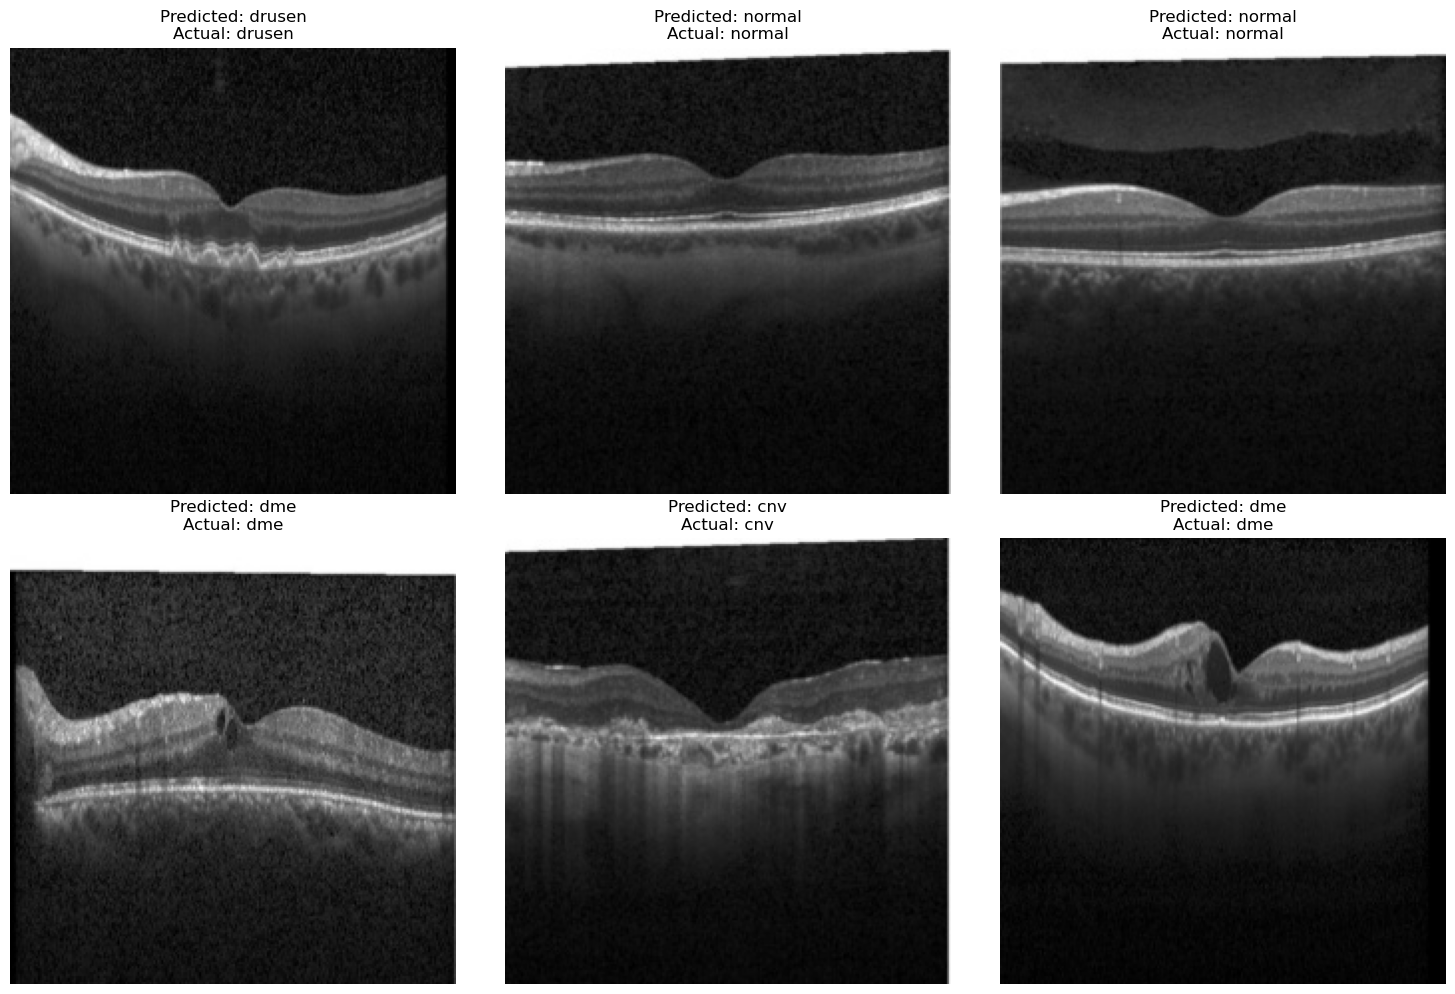

In [16]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define transformations to be applied to the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the same size used during training
    transforms.ToTensor(),           # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and standard deviation
])

def predict_image(image_path, actual_class, ax):
    # Load the image from the provided path
    image = Image.open(image_path).convert("RGB")  # Ensure image is RGB

    # Apply transformations to the image
    input_image = transform(image).unsqueeze(0)  # Add batch dimension

    # Move the input image to the appropriate device (CPU or GPU)
    input_image = input_image.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(input_image)

    # Get the predicted class index
    _, predicted = torch.max(outputs, 1)

    # Map predicted index to class label
    class_index = predicted.item()

    # Convert class index to actual class name using test_loader
    for class_name, idx in test_loader.dataset.class_to_idx.items():
        if idx == class_index:
            predicted_class_name = class_name
            break

    if predicted_class_name is not None:
        # Print predicted and actual class
        ax.set_title(f'Predicted: {predicted_class_name}\nActual: {actual_class}')
        
        # Plot the image
        ax.imshow(image)
        ax.axis('off')
    else:
        print("Failed to find the predicted class name.")

# List of image paths
image_paths = [r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\py_processed_test\drusen\DRUSEN-364469-4.jpeg", 
               r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\py_processed_test\normal\NORMAL-33637-1.jpeg",
                r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\py_processed_test\normal\NORMAL-101880-1.jpeg",
                  r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\py_processed_test\dme\DME-15208-1.jpeg",
                  r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\py_processed_test\cnv\CNV-154835-2.jpeg",
                  r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\py_processed_test\dme\DME-5014129-1.jpeg"]
actual_classes = ["drusen", "normal", "normal", "dme", "cnv" , 'dme']
# Create subplots
num_images = len(image_paths)
rows = (num_images // 3) + (1 if num_images % 3 != 0 else 0)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Predict and plot information for each image
for i, (image_path, actual_class) in enumerate(zip(image_paths, actual_classes)):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if rows > 1 else axes[col]
    predict_image(image_path, actual_class, ax)

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
import torch
from torchvision import transforms
from PIL import Image

# Define transformations to be applied to the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the same size used during training
    transforms.ToTensor(),           # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and standard deviation
])

# Load the image from the provided path
image_path = r"C:\Users\Shaikh Abdul Rafay\Desktop\Ann project\py_processed_test\drusen\DRUSEN-95633-1.jpeg"  # Replace with the actual path to your image
image = Image.open(image_path).convert("RGB")  # Ensure image is RGB

# Apply transformations to the image
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Move the input image to the appropriate device (CPU or GPU)
input_image = input_image.to(device)

# Set the model to evaluation mode
model.eval()

# Forward pass through the model
with torch.no_grad():
    outputs = model(input_image)

# Get the predicted class index
_, predicted = torch.max(outputs, 1)

# Map predicted index to class label
class_index = predicted.item()

# Convert class index to actual class name using test_loader
predicted_class_name = None
for class_name, idx in test_loader.dataset.class_to_idx.items():
    if idx == class_index:
        predicted_class_name = class_name
        break

if predicted_class_name is not None:
    print(f'Predicted Class Index: {class_index}')
    print(f'Predicted Class Name: {predicted_class_name}')
else:
    print("Failed to find the predicted class name.")


Predicted Class Index: 2

Predicted Class Name: drusen
